In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.tabular import *
import os
from tqdm import tqdm
import pdb

In [2]:
# setting paths
data_dir = os.path.abspath('./_data')
train_data_fp = os.path.join(data_dir, 'data.csv')
test_data_fp = os.path.join(data_dir, 'test.csv')
data_no_missing_fp = os.path.join(data_dir, 'data_no_missing.csv')
os.listdir(data_dir)

['data.csv', 'data_no_missing.csv', 'test.csv']

In [5]:
# loading data-set
train_data = pd.read_csv(train_data_fp)
test_data = pd.read_csv(test_data_fp)
data = pd.read_csv(data_no_missing_fp)
n_train = len(train_data)
n_test = len(test_data)

In [6]:
print(f'Training data-set consists of {train_data.shape[0]} rows and {train_data.shape[1]} columns')
print(f'Test data-set consists of {test_data.shape[0]} rows and {test_data.shape[1]} columns')

Training data-set consists of 616656 rows and 20 columns
Test data-set consists of 154165 rows and 19 columns


In [7]:
# store target value and drop it from 'train_data'
market_share = train_data.loc[:, 'Market Share_total'].values
train_data.drop(columns=['Market Share_total'], inplace=True)
train_data.head(1)

,Unnamed: 0,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Temperature in Montreal during episode
0,1,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,20.4


In [14]:
data.head().T

,0,1,2,3,4
station,V Total,V Total,V Total,V Total,V Total
ch_type,General Channel,General Channel,General Channel,General Channel,General Channel
length,8,2,2,4,2
show_name,Vidéoclips V,Apollo dans l'frigo,Infopublicité,"Infos, Les","Souper presque parfait, Un"
genre,Music Video Clips,Informal Education and Recreation and Leisure,"Infomercials, Promotional and Corporate Videos",News,Reality Programs
first_or_rerun,No,No,No,No,No
episodes_in_season,Yes,Yes,Yes,Yes,Yes
is_movie,No,No,No,No,No
overlaped_with_game,No,No,No,No,No
temperature,20.4,19.125,19.125,18.125,18.25


## Dealling with categorical features

In [10]:
data.columns

Index(['station', 'ch_type', 'length', 'show_name', 'genre', 'first_or_rerun',
       'episodes_in_season', 'is_movie', 'overlaped_with_game', 'temperature',
       'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'Elapsed', 'running_time',
       'episode_name_na', 'temperature_na'],
      dtype='object')

In [15]:
to_drop = ['show_name', 'Week', 'Day', 'Dayofyear']

cat_names = ['station', 'ch_type', 'genre', 'first_or_rerun', 'episodes_in_season', 'is_movie',
             'overlaped_with_game', 'Year', 'Month', 'Dayofweek', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
             'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'episode_name_na', 'temperature_na']

cont_names = ['length', 'temperature', 'Elapsed', 'running_time']

In [17]:
len(to_drop) + len(cat_names) + len(cont_names) == len(data.columns)

True

In [18]:
data.drop(columns=to_drop, inplace=True)

In [23]:
print('Number of unique entries in categorical columns:')
for col in cat_names:
    print(f'{col}: {len(data[col].unique())}')

Number of unique entries in categorical columns:
station: 24
ch_type: 2
genre: 27
first_or_rerun: 2
episodes_in_season: 2
is_movie: 2
overlaped_with_game: 2
Year: 4
Month: 12
Dayofweek: 7
Is_month_end: 2
Is_month_start: 2
Is_quarter_end: 2
Is_quarter_start: 2
Is_year_end: 2
Is_year_start: 2
episode_name_na: 2
temperature_na: 2


In [24]:
data['genre']

0                                         Music Video Clips
1             Informal Education and Recreation and Leisure
2            Infomercials, Promotional and Corporate Videos
3                                                      News
4                                          Reality Programs
                                ...                        
770816             General Entertainment and Human Interest
770817    Music and Dance other than Music Video Program...
770818                    Theatre Feature Films Aired on TV
770819                    Theatre Feature Films Aired on TV
770820                    Theatre Feature Films Aired on TV
Name: genre, Length: 770821, dtype: object

In [152]:
def transform(arr, gamma=1e-3):
    arr = np.asarray(arr)
    arr = arr + gamma
    return np.log(arr)

In [153]:
def reverse_transform(arr, gamma=1e-3):
    arr = np.asarray(arr)
    arr = np.exp(arr)
    return arr - gamma

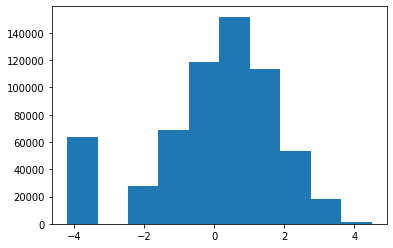

In [169]:
l = transform(market_share, gamma=1.5e-2)

plt.hist(l)
plt.show()

In [160]:
e = reverse_transform(l)

In [161]:
np.allclose(market_share, e)

True